<h2>Лабораторная работа №2 по курсу "Методы машинного обучения"</h2>

<p><b>Выполнил:</b> Саврасов П.А. группа ИУ5-24М</p>

<h3>Задание</h3>
<p>Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.<\p>
    <p>Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:</p>
<ul>
    <li>устранение пропусков в данных;</li>
    <li>кодирование категориальных признаков;</li>
    <li>нормализацию числовых признаков.</li>
</ul>

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [42]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [43]:
data = pd.read_csv('BankChurners.csv', sep=",")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Заполнение пустых значений

In [44]:
columnsWithNull = []

print("Столбцы с пустыми значениями (название (число уникальных значений): число пустых):\n")
for column in data.columns:
    if data[column].isnull().sum() > 0:
        columnsWithNull.append(column)
        print("\t", column,"(", len(data[column].unique()), "):\t", data[column].isnull().sum())
data[columnsWithNull].head(10)

Столбцы с пустыми значениями (название (число уникальных значений): число пустых):

	 Education_Level ( 7 ):	 1519
	 Marital_Status ( 4 ):	 749
	 Income_Category ( 6 ):	 1112


,Education_Level,Marital_Status,Income_Category
0,High School,Married,$60K - $80K
1,Graduate,Single,Less than $40K
2,Graduate,Married,$80K - $120K
3,High School,NaN,Less than $40K
4,Uneducated,Married,$60K - $80K
5,Graduate,Married,$40K - $60K
6,NaN,Married,$120K +
7,High School,NaN,$60K - $80K
8,Uneducated,Single,$60K - $80K
9,Graduate,Single,$80K - $120K


In [45]:
imputer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value = "Unknown")
nullFixedData = pd.DataFrame(data = imputer.fit_transform(data), columns=data.columns)
nullFixedData[columnsWithNull].head(10)

,Education_Level,Marital_Status,Income_Category
0,High School,Married,$60K - $80K
1,Graduate,Single,Less than $40K
2,Graduate,Married,$80K - $120K
3,High School,Unknown,Less than $40K
4,Uneducated,Married,$60K - $80K
5,Graduate,Married,$40K - $60K
6,Unknown,Married,$120K +
7,High School,Unknown,$60K - $80K
8,Uneducated,Single,$60K - $80K
9,Graduate,Single,$80K - $120K


Кодирование категориальных признаков

In [46]:
labelEnc = LabelEncoder()
for column in nullFixedData.columns:
    if nullFixedData[column].dtype not in ['float', 'int']:
        nullFixedData[[column]] = pd.DataFrame(labelEnc.fit_transform(nullFixedData[column].astype(str)), columns=[column])
nullFixedData.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,7152,1,19,1,3,3,1,2,0,26,...,518,1757,524,987,90,68,791,58,1666,631
1,9812,1,23,0,5,2,2,4,0,31,...,5723,1841,5880,1073,240,59,829,102,1465,634
2,3053,1,25,1,3,2,1,3,0,23,...,3718,0,3963,1154,1443,46,818,0,1302,638
3,7204,1,14,0,4,3,3,4,0,21,...,3612,1458,6123,1020,110,46,818,757,148,627
4,501,1,14,1,3,5,1,2,0,8,...,4463,0,4698,1145,4705,54,821,0,1304,638
5,2544,1,18,1,2,2,1,1,0,23,...,4080,245,3017,1009,53,50,507,308,1452,634
6,9493,1,25,1,4,6,1,0,1,33,...,3747,1246,3500,1136,319,57,399,63,112,628
7,9818,1,6,1,0,3,3,2,3,14,...,3135,396,3022,1147,945,62,392,45,1635,631
8,1401,1,11,1,3,5,2,2,0,23,...,2206,1458,2054,1156,357,50,710,110,1402,636
9,5893,1,22,1,2,2,2,3,0,23,...,332,679,6807,1069,633,58,538,141,546,610


Нормализация числовых признаков

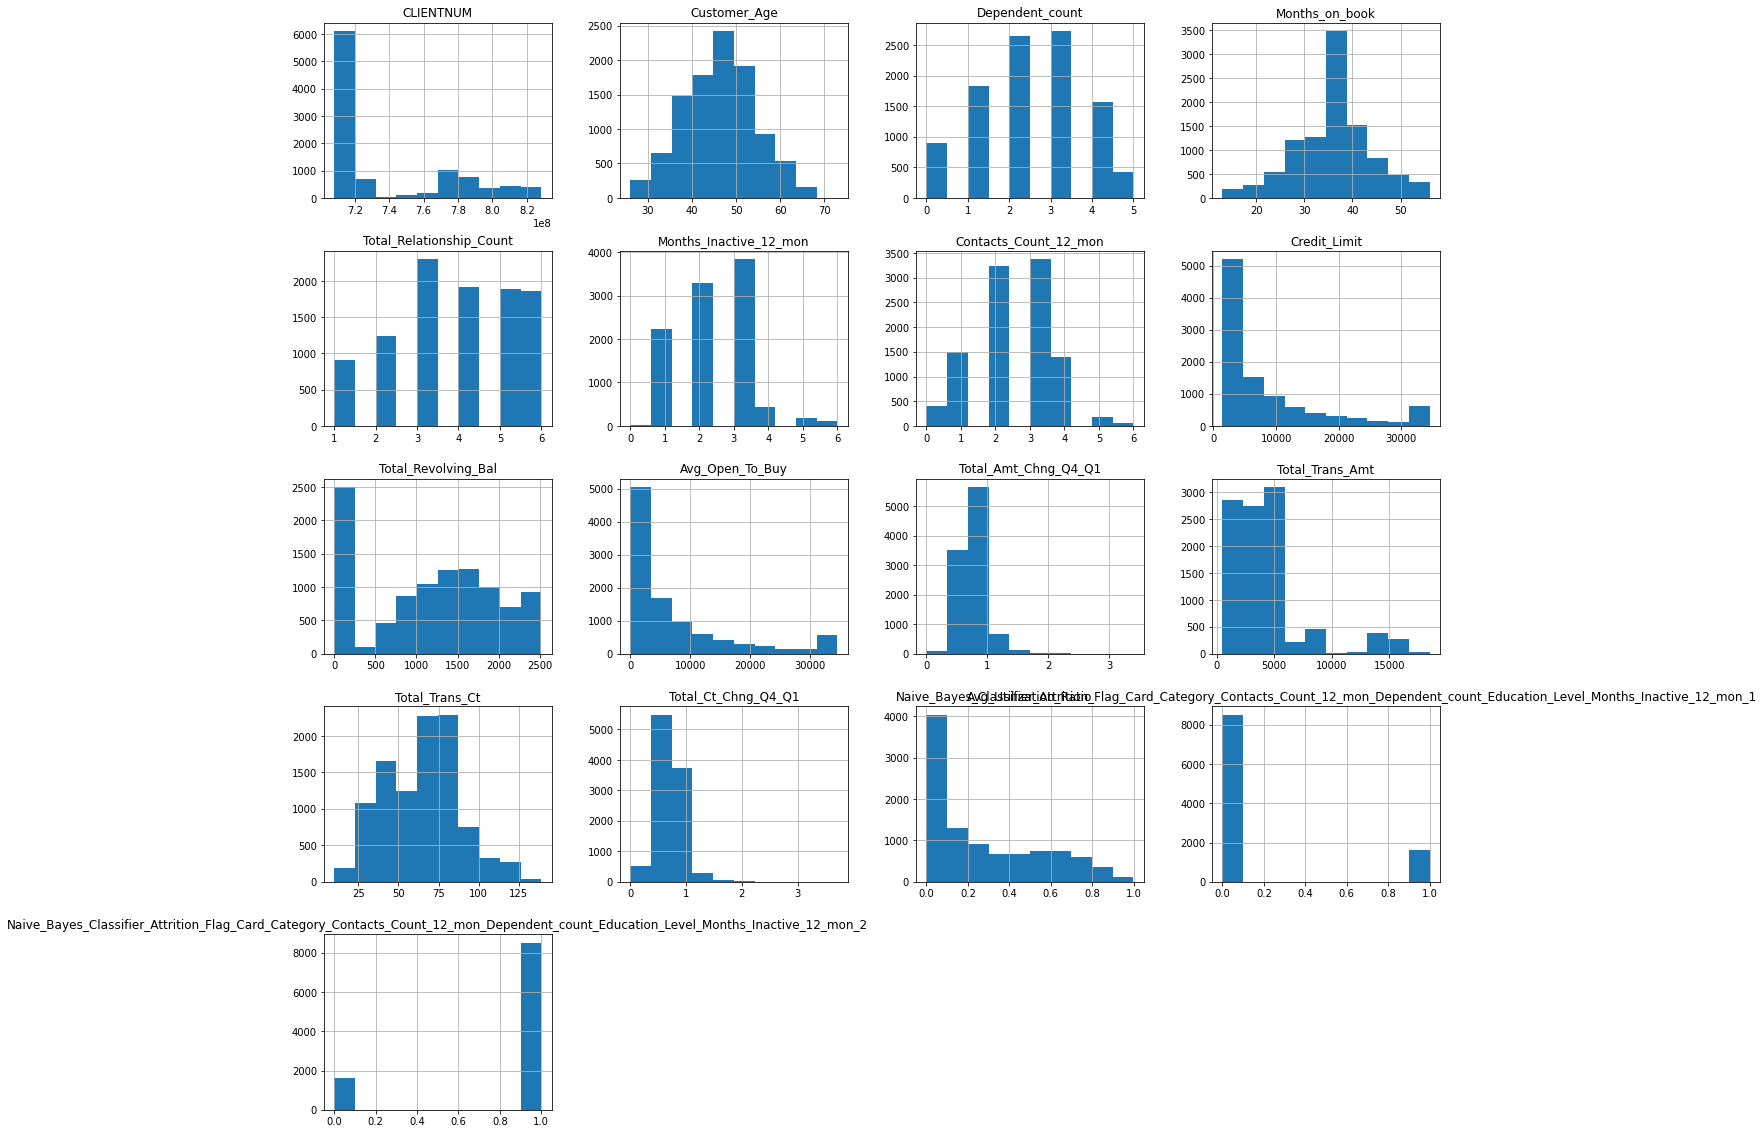

In [47]:
data.hist(figsize=(20,20))
plt.show()

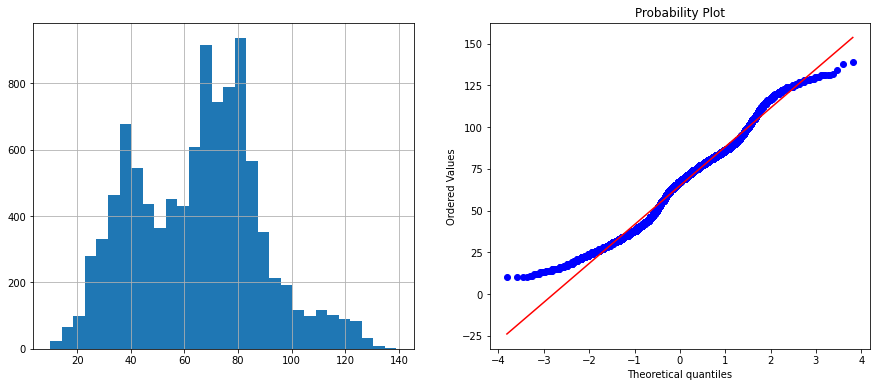

In [57]:
diagnostic_plots(data, 'Total_Trans_Ct')

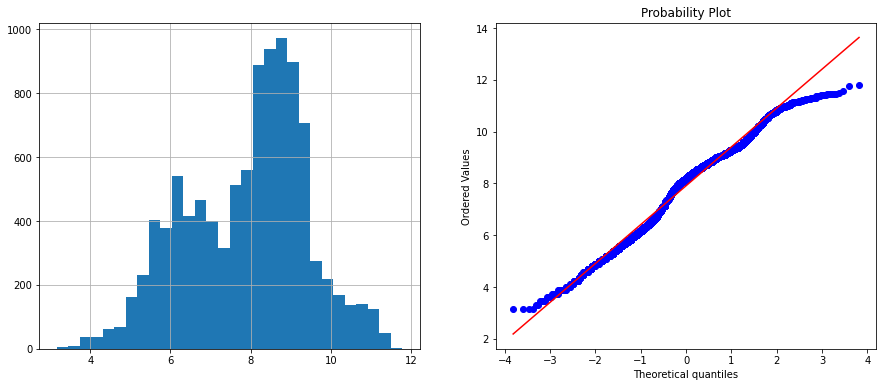

In [68]:
data['Total_Trans_Ct_sqrt'] = data['Total_Trans_Ct']**(1/2)
diagnostic_plots(data, 'Total_Trans_Ct_sqrt')